In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from utils import load_ds1, load_ds2, load_ds2_rand
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

from sklearn.externals import joblib
from functools import partial
from utils import *

In [2]:
def load_data():
    features_and_targets = partial(
        FT_ma_ewma_logreturns_vs_abs_logreturn, 
        ma_windows=[],
        ewma_halflifes=[12],
        lret_lookbacks = [1,2,3,4,5,7,10,12,15,19,20,25,30,40]
        )
    return load_stock_datasets(features_and_targets)

In [3]:
data = load_data()

In [4]:
print sorted(data.keys())

['AAPL', 'ABT', 'AIG', 'AMGN', 'APA', 'APC', 'AXP', 'BA', 'BAC', 'BAX', 'BIIB', 'BMY', 'C', 'CAT', 'CELG', 'CL', 'CMCSA', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DE', 'DELL', 'DHR', 'DIS', 'DOW', 'EMC', 'EMR', 'EOG', 'EXC', 'F', 'GE', 'GILD', 'HAL', 'HD', 'HON', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY', 'LOW', 'MCD', 'MDT', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NKE', 'ORCL', 'OXY', 'PEP', 'PFE', 'PG', 'PNC', 'PX', 'QCOM', 'SBUX', 'SLB', 'SO', 'SP500', 'SPG', 'T', 'TGT', 'TJX', 'TWX', 'TXN', 'UNH', 'UNP', 'USB', 'UTX', 'VZ', 'WFC', 'WMT', 'XOM']


In [5]:
data[data.keys()[0]].X_train.columns

Index([u'vol', u'ewma-12', u'lret-1', u'lret-2', u'lret-3', u'lret-4',
       u'lret-5', u'lret-7', u'lret-10', u'lret-12', u'lret-15', u'lret-19',
       u'lret-20', u'lret-25', u'lret-30', u'lret-40'],
      dtype='object')

In [8]:
ds = data['NKE']
ds.X_train

,vol,ewma-12,lret-1,lret-2,lret-3,lret-4,lret-5,lret-7,lret-10,lret-12,lret-15,lret-19,lret-20,lret-25,lret-30,lret-40
1990-03-01,0.000000,0.014276,0.035878,0.018428,0.018786,-0.018786,0.000000,-0.004612,-0.007089,-0.004721,-0.004788,-0.040409,0.004968,-0.036533,-0.013795,-0.022460
1990-03-02,0.035878,0.015606,0.000000,0.035878,0.018428,0.018786,-0.018786,-0.004633,0.021154,0.004721,0.009566,0.040409,-0.040409,-0.014065,0.018355,-0.020669
1990-03-05,0.022573,0.016032,-0.035878,0.000000,0.035878,0.018428,0.018786,0.000000,0.009244,-0.007089,0.009476,0.038841,0.040409,0.009399,0.018013,0.029715
1990-03-06,0.035091,0.017194,0.022573,-0.035878,0.000000,0.035878,0.018428,-0.018786,-0.004612,0.021154,-0.004721,-0.004778,0.038841,-0.028441,-0.004467,-0.004519
1990-03-07,0.029734,0.017954,0.035091,0.022573,-0.035878,0.000000,0.035878,0.018786,-0.004633,0.009244,0.004721,-0.004788,-0.004778,-0.034242,0.000000,-0.018271
1990-03-08,0.024786,0.018366,0.029734,0.035091,0.022573,-0.035878,0.000000,0.018428,0.000000,-0.004612,-0.007089,0.009566,-0.004788,0.004968,-0.036533,-0.004612
1990-03-09,0.004094,0.017508,0.024786,0.029734,0.035091,0.022573,-0.035878,0.035878,-0.018786,-0.004633,0.021154,0.009476,0.009566,-0.040409,-0.014065,-0.004633
1990-03-12,0.019554,0.017631,-0.004094,0.024786,0.029734,0.035091,0.022573,0.000000,0.018786,0.000000,0.009244,-0.004721,0.009476,0.040409,0.009399,-0.004666
1990-03-13,0.008094,0.017062,0.019554,-0.004094,0.024786,0.029734,0.035091,-0.035878,0.018428,-0.018786,-0.004612,0.004721,-0.004721,0.038841,-0.028441,0.009299
1990-03-14,0.008094,0.016529,-0.008094,0.019554,-0.004094,0.024786,0.029734,0.022573,0.035878,0.018786,-0.004633,-0.007089,0.004721,-0.004778,-0.034242,0.013795


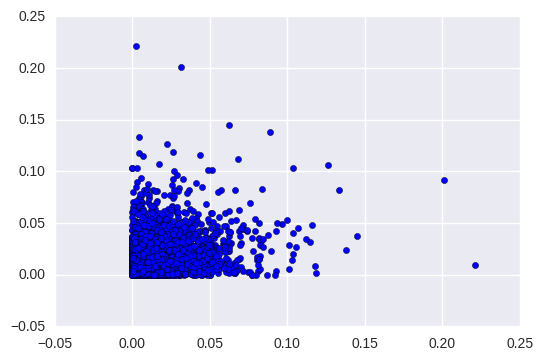

In [9]:
plt.scatter(ds.X_train['vol'], ds.Y_train.iloc[:,0])

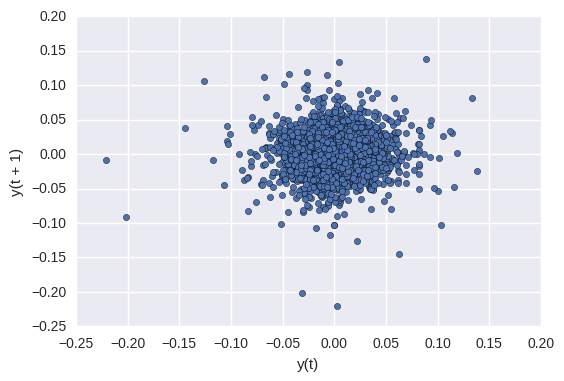

In [10]:
from pandas.tools.plotting import lag_plot
plt.show()
lag_plot(ds.X_train['lret-10'])
plt.show()

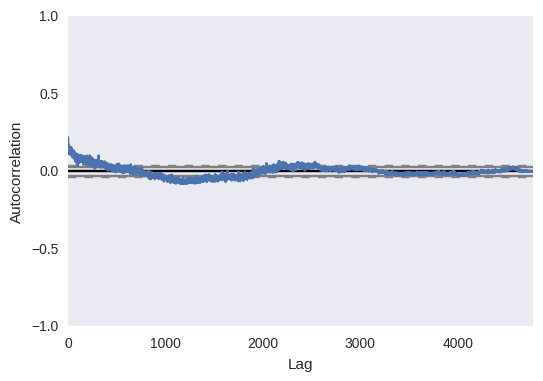

In [11]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(ds.X_train['vol'])

,vol,ewma-12,lret-1,lret-2,lret-3,lret-4,lret-5,lret-7,lret-10,lret-12,lret-15,lret-19,lret-20,lret-25,lret-30,lret-40
2009-01-29,0.028802,0.019398,0.004173,0.004063,0.007150,-0.002432,-0.013080,-0.023448,-0.036862,-0.013367,-0.025861,0.015655,0.007279,-0.001467,-0.006234,-0.075654
2009-01-30,0.006776,0.018690,-0.028802,0.004173,0.004063,0.007150,-0.002432,0.038192,0.020560,0.017869,0.010678,0.022420,0.015655,0.002533,0.039125,0.043451
2009-02-02,0.002742,0.017795,-0.006776,-0.028802,0.004173,0.004063,0.007150,-0.013080,0.018610,-0.036862,-0.019406,-0.000123,0.022420,0.009014,-0.025336,0.016865
2009-02-03,0.018475,0.017833,0.002742,-0.006776,-0.028802,0.004173,0.004063,-0.002432,-0.023448,0.020560,-0.013367,-0.016427,-0.000123,0.018436,-0.051384,-0.034282
2009-02-04,0.005906,0.017163,0.018475,0.002742,-0.006776,-0.028802,0.004173,0.007150,0.038192,0.018610,0.017869,-0.025861,-0.016427,0.010695,-0.026051,0.004317


,target-1
2009-01-29,0.006776
2009-01-30,0.002742
2009-02-02,0.018475
2009-02-03,0.005906
2009-02-04,0.026932


 samples 4773


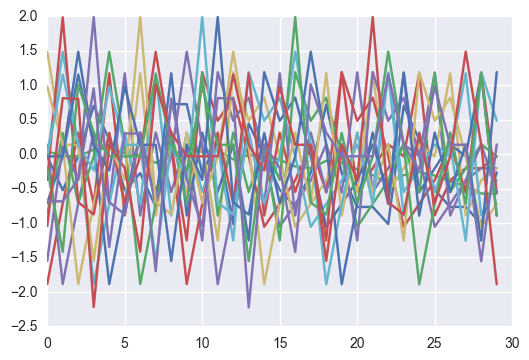

In [8]:
ds = data['XOM']

X_train = ds.X_train
Y_train = ds.Y_train

X_dev = ds.X_dev
Y_dev = ds.Y_dev

X_test = ds.X_test
Y_test = ds.Y_test

display(X_train.tail())
display(Y_train.tail())

# scale and normalise
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_dev_scaled = scaler.transform(X_dev)
X_test_scaled = scaler.transform(X_test)


# experimental y scaling.
yscaler = StandardScaler()
Y_train_scaled = yscaler.fit_transform(Y_train)
Y_dev_scaled = yscaler.transform(Y_dev).ravel()
Y_test_scaled = yscaler.transform(Y_test).ravel()

plt.plot(X_train_scaled[:30])
print "samples", len(X_train)

In [88]:
# report correlation between input and output features
FEATURE_LOOKBACKS=np.arange(40)+1
TARGET_LOOKAHEADS=[1]
FEATURE_COLS = ['lret-' + str(lb) for lb in FEATURE_LOOKBACKS]
TARGET_COLS = ['target-' + str(la) for la in TARGET_LOOKAHEADS]
c1 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
c2 = pd.DataFrame(index=FEATURE_COLS, columns=TARGET_COLS)
for f in FEATURE_COLS:
    for t in TARGET_COLS:
        c1.ix[f][t] =  X_train[f].abs().corr(Y_train[t].abs())
        c2.ix[f][t] =  X_train[f].corr(Y_train[t])
        #print lb, la, X_train['lret-' + str(lb)].abs().corr(Y_train['target-' + str(la)].abs()), X_train['lret-' + str(lb)].corr(Y_train['target-' + str(la)])

#display("correlation of abs returns", c1)
#display("correlation of returns", c2)
#sns.heatmap(c1.astype(float))
#plt.show()
#sns.heatmap(c2.astype(float))

plt.plot(c1.values, label = 'correlation of abs returns')
plt.plot(c2.values, label = 'correlation of returns')
plt.legend()

KeyError: 'lret-6'

In [ ]:
# y = df['lret'].shift(-1).abs()
# corr = []
# ix = []
# for i in range(1,101):
#     name = 'mavol' + str(i)
#     df[name] = df['lret'].rolling(i).std() 
#     x = df[name]
#     #print  i, x.corr(y)
#     ix.append(i)
#     corr.append(x.corr(y))

# plt.plot(ix, corr)
# plt.show()


In [16]:
%%time

from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import expon as sp_expon
from sklearn.model_selection import TimeSeriesSplit

model = RandomForestRegressor()
param_dist = {"n_estimators": sp_randint(1,200),
              "max_depth": sp_randint(1,20),
             }

# model = SVR()
# param_dist = {'C': sp_expon(scale=100), 'gamma': sp_expon(scale=.1),
#   'kernel': ['rbf', 'linear']}


# run randomized search
n_iter_search = 50 # was 50
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search, n_jobs=-1, cv=TimeSeriesSplit(n_splits=3))

random_search.fit(X_train_scaled, Y_train_scaled.ravel())
#random_search.fit(X_train_scaled, Y_train.values)


#model = MultiOutputRegressor(SVR())
# model = DecisionTreeRegressor(max_depth=5)

print random_search.score(X_train_scaled, Y_train_scaled)
print random_search.score(X_dev_scaled, Y_dev_scaled)



0.442616345691
0.0719681497315
CPU times: user 5.2 s, sys: 148 ms, total: 5.34 s
Wall time: 36.7 s


In [17]:
len(X_train_scaled)

4773

In [6]:
random_search = joblib.load('rand_searched_rfregressor.pkl') 

In [9]:
# on scaled X and Y...
print "train", np.sqrt(mean_squared_error(Y_train_scaled, random_search.predict(X_train_scaled) )) / Y_train_scaled.std()
print "dev", np.sqrt(mean_squared_error(Y_dev_scaled, random_search.predict(X_dev_scaled) )) / Y_dev_scaled.std()


train 0.746581311251
dev 0.963344097542


todo:
    treat ewma and ma as models
    seperate models from features and evaluation
    add metrics functions to evaluate key criteria, independent of model and dataset.

In [10]:
from sklearn.metrics import r2_score

Y_train_predict = random_search.predict(X_train_scaled)
Y_dev_predict = random_search.predict(X_dev_scaled)
print "train r2 score", r2_score(Y_train, Y_train_predict)
print "dev r2 score", r2_score(Y_dev, Y_dev_predict)

train_mse = mean_squared_error(Y_train_scaled, Y_train_predict)
print "train mse", train_mse
print "train rmse", np.sqrt(train_mse)
print "train rel rmse", rmse_rel_std(Y_train_scaled, Y_train_predict)

dev_mse = mean_squared_error(Y_dev_scaled, Y_dev_predict)
print "dev mse", dev_mse
print "dev rmse", np.sqrt(dev_mse)
print "dev rel rmse", rmse_rel_std(Y_dev_scaled, Y_dev_predict)

train r2 score -2032.06312729
dev r2 score -1014.89215679
train mse 0.557383654309
train rmse 0.746581311251
train rel rmse 0.746581311251
dev mse 0.566196320046
dev rmse 0.752460178379
dev rel rmse 0.963344097542


In [20]:
joblib.dump(random_search, 'rand_searched_rfregressor.pkl')

['rand_searched_rfregressor.pkl']

In [11]:
print "X_train_scaled shape", X_train_scaled.shape
print "Y_train", Y_train.values.ravel().shape

X_train_scaled shape (4773, 16)
Y_train (4773,)


In [12]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import GaussianDropout
from keras.regularizers import l2, activity_l2

Using TensorFlow backend.


In [13]:
X_train.columns

Index([u'vol', u'ewma-12', u'lret-1', u'lret-2', u'lret-3', u'lret-4',
       u'lret-5', u'lret-7', u'lret-10', u'lret-12', u'lret-15', u'lret-19',
       u'lret-20', u'lret-25', u'lret-30', u'lret-40'],
      dtype='object')

In [14]:
model = keras.models.load_model('nn-500-500-no-dropout-4k.h5')

In [15]:
# construct FCNN model
features = X_train.columns
input_dims = len(features)
print "input dims", input_dims

input dims 16


In [38]:
# create model
model = Sequential()
model.add(Dense(input_dims, input_dim=input_dims, init='he_normal', activation='relu'))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
model.add(Dense(500, init='he_normal', activation='relu' ))
#model.add(GaussianDropout(0.1))
#model.add(Dense(100, init='normal', activation='relu' ))
#model.add(GaussianDropout(0.7))
model.add(Dense(1, init='he_normal'))
# Compile model
model.compile(loss='mse', optimizer='adam')

#model.fit(X_train_scaled, Y_train)

In [16]:
# combine all data sets into a single one
X_train_scaled_all = None
Y_train_all = None
X_dev_all = None
X_dev_scaled_all = None
Y_dev_all = None


for sym in data.keys():
   
    ds = data[sym]
    X_train = ds.X_train[features]
    Y_train = ds.Y_train
    X_dev = ds.X_dev[features]
    Y_dev = ds.Y_dev

    # scale and normalise
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_dev_scaled = scaler.transform(X_dev)

    if X_train_scaled_all is None:
        X_train_scaled_all = X_train_scaled
        X_dev_all = X_dev
        X_dev_scaled_all = X_dev_scaled
        Y_train_all = Y_train
        Y_dev_all = Y_dev
    else:
        X_train_scaled_all = np.concatenate( (X_train_scaled_all, X_train_scaled), axis=0)
        X_dev_all = np.concatenate( (X_dev_all, X_dev), axis=0)
        X_dev_scaled_all = np.concatenate( (X_dev_scaled_all, X_dev_scaled), axis=0)
        Y_train_all = np.concatenate( (Y_train_all, Y_train), axis=0)
        Y_dev_all = np.concatenate( (Y_dev_all, Y_dev), axis=0)

In [17]:
print X_train_scaled_all.shape
print Y_train_all.shape
print X_dev_scaled_all.shape
print Y_dev_all.shape

(377595, 16)
(377595, 1)
(72823, 16)
(72823, 1)


In [18]:
# effectiveness of using ewma-12 as a predictive model.
model_col = list(X_dev.columns).index('ewma-12')
rmse_rel_std(Y_dev_all, X_dev_all[:, model_col])

0.90510406489881901

In [114]:
import os
class MyCallback(keras.callbacks.Callback):
    def __init__(self, run_id, count=0, tl = [], dl = []):
        self.run_id = run_id
        self.train_losses = tl        
        self.dev_losses = dl
        self.count = count
        
    def on_epoch_end(self, epoch, logs):
        print epoch, logs['loss']
        self.count+=1
        if self.count %10 == 0:
            print count, epoch            
            train_rel_rmse = rmse_rel_std(Y_train_all, self.model.predict(X_train_scaled_all))
            dev_rel_rmse = rmse_rel_std(Y_dev_all, self.model.predict(X_dev_scaled_all))
            print "train rel rmse", train_rel_rmse
            print "dev rel rmse", dev_rel_rmse
            
            self.train_losses.append(train_rel_rmse)
            self.dev_losses.append(dev_rel_rmse)
        if self.count %100 == 0:
            self.model.save('{}-nn-500-500-no-dropout-{}.h5'.format(run_id, count))
            
    def save(self):
        np.savez(self.run_id, run_id=self.run_id, count=self.count, tl=np.array(self.train_losses), dl=np.array(self.dev_losses))
        
    @classmethod 
    def load(cls, run_id):
        filename = run_id + ".npz"
        npz = np.load(filename)
        run_id = str(npz['run_id'])
        count = int(npz['count'])
        tl = list(npz['tl'])
        dl = list(npz['dl'])
        return MyCallback(run_id, count, tl, dl)
    @classmethod
    def create_or_load(cls, run_id):
        filename = run_id + ".npz"
        if os.path.exists(filename):
            print "loading from file:", filename
            return cls.load(run_id)
        else:
            print "creating new progress for run id:", run_id
            return MyCallback(run_id)
        

creating new progress for run id: foo4


In [117]:
run_id = "foo3"
progress = MyCallback.create_or_load(run_id)

loading from file: foo3.npz


In [118]:
%%time
hist = model.fit(X_train_scaled_all, Y_train_all, nb_epoch=2, verbose=0, batch_size=150000, shuffle=True, callbacks=[progress])
progress.save()

0 0.0002225737373
1 0.000222439568731
CPU times: user 1min 58s, sys: 14.3 s, total: 2min 12s
Wall time: 37.9 s


In [65]:
np.savetxt('prog.np', [progress.train_losses, progress.dev_losses])

In [23]:
[progress.train_losses, progress.dev_losses] = np.loadtxt('prog.np')

In [24]:
plt.plot(hist.history['loss'])
plt.show()
print "train score", rmse_rel_std(Y_train_all, model.predict(X_train_scaled_all))
print "dev score", rmse_rel_std(Y_dev_all, model.predict(X_dev_scaled_all))
plt.plot(progress.train_losses, label='train')
plt.plot(progress.dev_losses, label='dev')
plt.legend()
plt.show()

NameError: name 'hist' is not defined

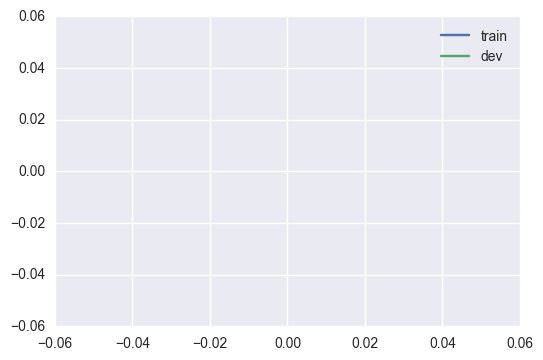

In [121]:
plt.plot(progress.train_losses, label='train')
plt.plot(progress.dev_losses, label='dev')
plt.legend()
plt.show()

In [53]:
print Y_dev_all.shape
print X_dev_scaled_all.shape

(72823, 1)
(72823, 16)


In [66]:
model.save('nn-500-500-no-dropout-4k.h5')


In [ ]:
model = keras.models.load_model('nn-500-500-no-dropout.h5')

In [ ]:
plt.plot(progress.train_losses, progress.dev_losses)

In [ ]:
%%time 
hist = model.fit(X_train_scaled, Y_train.values.ravel(), nb_epoch=2000, verbose=0, batch_size=512000)
plt.plot(hist.history['loss'])
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))

In [ ]:
print "train score", r2_score(Y_train, model.predict(X_train_scaled))
print "dev score", r2_score(Y_dev, model.predict(X_dev_scaled))
#print "dev corr", Y_dev.corr(model.predict(X_dev_scaled))
#?? args to corr



In [ ]:
print Y_dev.mean()
print np.sqrt(min(hist.history['loss']))

- for all stocks split to train, dev, test.
- compute range of 5*ma_cross signals.
- compute return for each
- summarise mean performance across the set. train / dev / test

- then train single model across all train. tune on dev.
- compare that model mean performance across all stocks.

** set up hold out set of stocks that aren't used for model development.